In [1]:
import numpy as np
import pandas as pd
import random
from lets_plot import *
from lets_plot.mapping import as_discrete


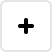
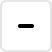
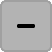
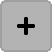
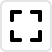
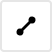
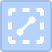
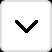
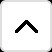
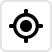
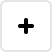
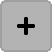
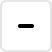
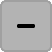
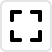
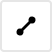
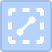
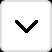
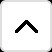
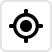

In [2]:
def dump_plot(plot, display=None):
    import json

    try:
        import clipboard
    except:
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True
    
    if display:
        print(plot_json)

    return plot

LetsPlot.setup_html()

## Regression Testing
Regression testing of geometries that may be affected by current changes.

### Scatter Plots

In [3]:
np.random.seed(42)
data = dict(
    cond=np.repeat(['A','B'], 10),
    xvar=[i + random.normalvariate(0, 3) for i in range(0,20)],
    yvar=[i + random.normalvariate(0, 3) for i in range(0,20)]
)

In [4]:
gggrid([
        ggplot(data, aes(x='xvar', y='yvar')) + geom_point(shape=1),
        ggplot(data, aes(x='yvar', y='xvar')) + geom_point(shape=1),
        ggplot(data, aes(x='xvar', y='yvar')) + geom_point(shape=1) + geom_smooth(),
        ggplot(data, aes(x='yvar', y='xvar')) + geom_point(shape=1) + geom_smooth()
])

In [5]:
gggrid([
        ggplot(data, aes(x='xvar', y='yvar', color='cond')) + geom_point(shape=1) + geom_smooth(se=False),
        ggplot(data, aes(x='yvar', y='xvar', color='cond')) + geom_point(shape=1) + geom_smooth(se=False)
])

### Marginal Plots

In [6]:
np.random.seed(42)
cov0=[[1, -.8], [-.8, 1]]     
cov1=[[ 10, .1], [.1, .1]]

x0, y0 = np.random.multivariate_normal(mean=[-2,0], cov=cov0, size=200).T
x1, y1 = np.random.multivariate_normal(mean=[0,1], cov=cov1, size=200).T

data = dict(
    x = np.concatenate((x0,x1)),
    y = np.concatenate((y0,y1)),
    c = ["A"]*200 + ["B"]*200
)

In [7]:
gggrid([
    ggplot(data, aes("x", "y")) + geom_density2df(aes(fill="..level..")) + coord_cartesian() \
     + ggmarginal("tr", layer=geom_area(stat="density")),
    ggplot(data, aes("y", "x")) + geom_density2df(aes(fill="..level..")) + coord_cartesian() \
     + ggmarginal("tr", layer=geom_area(stat="density"))
])

### `coord_flip()`

In [8]:
np.random.seed(42)
n = 10
x = np.arange(n)
y = 1 + np.random.randint(5, size=10)
gggrid([
    ggplot() + geom_bar(aes(x='x', y='y'), data={'x': x, 'y': y}, stat='identity'),
    ggplot() + geom_bar(aes(x='x', y='y'), data={'x': x, 'y': y}, stat='identity') + coord_flip()
])

### `geom_bar()`

In [9]:
data = {
    'code': ['a','b','c','d','e'],
    'value': [2, 5, 3, 8, -1],
}

In [10]:
gggrid([
    ggplot(data, aes('code', 'value')) + geom_bar(stat='identity'),
    ggplot(data, aes('value', 'code')) + geom_bar(orientation='y', stat='identity'),
    ggplot(data, aes('value', 'code')) + geom_bar(stat='identity'),
    ggplot(data) + geom_bar(aes('value', 'code'), stat='identity'),
    ggplot(data, aes('value', as_discrete('code'))) + geom_bar(stat='identity')
])

### `geom_lollipop()`

In [11]:
gggrid([
    ggplot(data, aes('code', 'value')) + geom_lollipop(stat='identity'),
    ggplot(data, aes('value', 'code')) + geom_lollipop(orientation='y', stat='identity'),
    ggplot(data, aes('value', 'code')) + geom_lollipop(stat='identity'),
    ggplot(data) + geom_lollipop(aes('value', 'code'), stat='identity'),
    ggplot(data, aes('value', as_discrete('code'))) + geom_lollipop(stat='identity')    
])

### `geom_boxplot()`

In [12]:
n = 100
np.random.seed(42)
data = {
    'code': np.random.choice(list('abcde'), size=100),
    'value': np.random.normal(size=100),
    'value_str': [str(i) for i in np.random.normal(size=100)],
}

In [13]:
gggrid([
    ggplot(data, aes('code', 'value')) + geom_boxplot(),
    ggplot(data, aes('value', 'code')) + geom_boxplot(orientation='y'),
    ggplot(data, aes('value', 'code')) + geom_boxplot(),
    ggplot(data) + geom_boxplot(aes('value', 'code')),
    ggplot(data, aes('value', as_discrete('code'))) + geom_boxplot()    
])

### `geom_violin()`

In [14]:
gggrid([
    ggplot(data, aes('code', 'value')) + geom_violin(),
    ggplot(data, aes('value', 'code')) + geom_violin(orientation='y'),
    ggplot(data, aes('value', 'code')) + geom_violin(),
    ggplot(data) + geom_violin(aes('value', 'code')),
    ggplot(data, aes('value', as_discrete('code'))) + geom_violin()    
])

### `geom_ydotplot()`

In [15]:
p = gggrid([
    ggplot(data, aes('code', 'value')) + geom_ydotplot(),
    ggplot(data, aes('value', 'code')) + geom_ydotplot(orientation='y'),
    ggplot(data, aes('value', 'code')) + geom_ydotplot(),
    ggplot(data) + geom_ydotplot(aes('value', 'code')),
    ggplot(data, aes('value', as_discrete('code'))) + geom_ydotplot()    
])
dump_plot(p)

## Some Special Cases

### `geom_smooth()`
`geom_smooth()` needs `orientation=”y”` when we want to flip axis.

In [16]:
np.random.seed(42)
n = 100
x = np.linspace(-2, 2, n)
y = x ** 2 + np.random.normal(size=n)

In [17]:
gggrid([
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_point() + geom_smooth(deg=2, se=False),
    ggplot({'x': x, 'y': y}, aes(x='y', y='x')) + geom_point() + geom_smooth(deg=2, se=False),
    ggplot({'x': x, 'y': y}, aes(x='y', y='x')) + geom_point() + geom_smooth(deg=2, se=False, orientation="y"),
])

### Few Datasets

If we have some dataset in the `ggplot()` context, then we can use data from it in `geom_boxplot()`. And, in this case, we can use variable names from the `ggplot()` context even if we set another context in `geom_boxplot()`.

In [18]:
np.random.seed(42)
data = {
    'code': np.random.choice(list('abcde'), size=100),
    'value': np.random.normal(size=100),
    'value_str': [str(i) for i in np.random.normal(size=100)],
}
data_num = {
    'number': np.random.choice(list('qwxyz'), size=100),
    'volume': np.random.normal(size=100),
}

In [19]:
gggrid([
    ggplot(data, aes('value', 'code')) + geom_boxplot(aes('number', 'volume'), data = data_num),
    ggplot(data, aes('value', 'code')) + geom_boxplot(aes('value', 'code'), data = data_num)
])

### `stat_summary(geom='crossbar')`

In [20]:
gggrid([
    ggplot(data, aes('code', 'value')) + stat_summary(geom='crossbar'),
    ggplot(data, aes('value', 'code')) + stat_summary(geom='crossbar') 
])

### Discrete Both Axes

In [21]:
x = ['a', 'a', 'b', 'b']
y = ['x','x', 'x', 'y']

For `stat_sum()` and `geom_point()`, rotation does not work for both discrete axes.

In [22]:
gggrid([
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + stat_sum(),
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_point(orientation="y")
])

The lollipop can be drawing when both axes are discrete. But this case is not usual for a lollipop.

In [23]:
x = ['a', 'a', 'a', 'b', 'b']
y = ['x','x', 'x', 'y', 'y']
gggrid([
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_lollipop(stat='count'),
    ggplot({'x': x, 'y': y}, aes(x='x')) + geom_lollipop(stat='count'),
    ggplot({'x': x, 'y': y}, aes(y='y')) + geom_lollipop(stat='count'), 
    ggplot({'x': x, 'y': y}, aes(y='y')) + geom_lollipop(stat='count', orientation='x'), 
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_lollipop(stat='count', orientation='y')  
])

### `stat='boxplot'`

In [24]:
n = 50
np.random.seed(42)
x = np.random.uniform(size=n)
c = np.random.choice(['a', 'b', 'c'], size=n)

In [25]:
p1 = ggplot({'x': x, 'c': c}) + \
    geom_crossbar(aes(x='c', y='x', color='c'), \
                  stat='boxplot') + \
    geom_point(aes(x='c', y='x', color='c'), \
               size=4, shape=21, fill='white',
               position=position_jitterdodge(seed=42))
p2 = ggplot({'x': x, 'c': c}) + \
    geom_crossbar(aes(x='x', y='c', color='c'), \
                  stat='boxplot') + \
    geom_point(aes(x='x', y='c', color='c'), \
               size=4, shape=21, fill='white',
               position=position_jitterdodge(seed=42))
gggrid([p1, p2])

In [26]:
n = 100
np.random.seed(42)
x = np.random.choice(['a', 'b', 'c'], size=n)
y = np.random.normal(size=n)

In [27]:
gggrid([
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_pointrange(stat='boxplot'),
    ggplot({'x': x, 'y': y}, aes(x='y', y='x')) + geom_pointrange(stat='boxplot')
])

### `stat='boxplot_outlier'`

In [28]:
gggrid([
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_pointrange(stat='boxplot_outlier'),
    ggplot({'x': x, 'y': y}, aes(x='y', y='x')) + geom_pointrange(stat='boxplot_outlier')
])

### `stat_summary()`

In [29]:
p1 = ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    stat_summary(position=position_nudge(x=-.1), color="red") + \
    stat_summary(fun='mq', fun_min='lq', fun_max='uq', quantiles=[.1, .5, .9], \
                 position=position_nudge(x=.1), color="blue")
p2 = p=ggplot({'x': x, 'y': y}, aes(x='y', y='x')) + \
    stat_summary(position=position_nudge(x=-.1), color="red") + \
    stat_summary(fun='mq', fun_min='lq', fun_max='uq', quantiles=[.1, .5, .9], \
                 position=position_nudge(x=.1), color="blue")
gggrid([p1, p2])

### `stat='ydensity'`

In [30]:
gggrid([    
    ggplot({'x': x, 'y': y}, aes('x', 'y')) + geom_crossbar(aes(ymin='..y..', ymax='..y..', width='..violinwidth..'), stat='ydensity'),
    ggplot({'x': x, 'y': y}, aes('y', 'x')) + geom_crossbar(aes(ymin='..y..', ymax='..y..', width='..violinwidth..'), stat='ydensity', orientation='y'),
    ggplot({'x': x, 'y': y}, aes('y', 'x')) + geom_crossbar(aes(ymin='..y..', ymax='..y..', width='..violinwidth..'), stat='ydensity')
])

### `stat='ydotplot'`

In [31]:
n = 100
np.random.seed(42)
x = np.random.choice(['a'], size=n)
y = np.random.normal(size=n)

In [32]:
gggrid([    
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_crossbar(aes(ymin='..y..', ymax='..y..', width='..count..'), stat='ydotplot'),
    ggplot({'x': x, 'y': y}, aes(x='y', y='x')) + geom_crossbar(aes(ymin='..y..', ymax='..y..', width='..count..'), stat='ydotplot', orientation='y'),
    ggplot({'x': x, 'y': y}, aes(x='y', y='x')) + geom_crossbar(aes(ymin='..y..', ymax='..y..', width='..count..'), stat='ydotplot')
])